In [15]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import backend as K

In [16]:
K.clear_session()

In [17]:
model=keras.applications.Xception(weights='imagenet')

In [18]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 299, 299, 3)  0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 149, 149, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 149, 149, 32) 0           block1_conv1_bn[0][0]            
__________________________________________________________________________________________________
block1_con

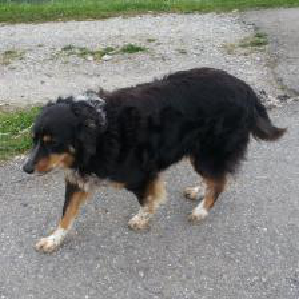

In [20]:
import PIL.Image as Image

img = Image.open('photo.jpg').resize(size=[299, 299])
img

In [21]:
import numpy as np

img_batch = np.array(img)[np.newaxis, :, :, :]
print('Batch size:', img_batch.shape) # (1, 299, 299, 3)
print('Data type:', img_batch.dtype) # uint8

Batch size: (1, 299, 299, 3)
Data type: uint8


In [22]:
predictions = model.predict(img_batch/255)
predictions.shape # (1, 1000)

(1, 1000)

In [23]:
print(predictions[0, :5])


[0.00025699 0.00036301 0.00066391 0.00054555 0.00024192]


In [24]:
from tensorflow.keras.applications.mobilenet_v2 import decode_predictions

decode_predictions(predictions, top=5)


[[('n02107683', 'Bernese_mountain_dog', 0.26701415),
  ('n02107908', 'Appenzeller', 0.04608716),
  ('n02108551', 'Tibetan_mastiff', 0.043670684),
  ('n02106030', 'collie', 0.031259313),
  ('n02101006', 'Gordon_setter', 0.029945232)]]

In [25]:
model.compile(optimizer='sgd', loss='categorical_crossentropy')
model.save('model.h5')

In [26]:
K.clear_session() # Create new graph to avoid clutter
new_model = keras.models.load_model('model.h5') # Load model

# New predictions
decode_predictions(new_model.predict(img_batch/255))

[[('n02107683', 'Bernese_mountain_dog', 0.26701415),
  ('n02107908', 'Appenzeller', 0.04608716),
  ('n02108551', 'Tibetan_mastiff', 0.043670684),
  ('n02106030', 'collie', 0.031259313),
  ('n02101006', 'Gordon_setter', 0.029945232)]]